In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Charger le dataset
data_path = '/content/train.csv'  # Remplacer par le chemin vers votre fichier
df = pd.read_csv(data_path)




Objectif : Charger le dataset à partir du fichier CSV spécifié.

In [ ]:
# 1. Description du dataset
print("\nAperçu du dataset :")
print(df.head())




Aperçu du dataset :
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  


In [ ]:
print("\nInformations générales :")
print(df.info())



Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nu

In [ ]:
print("\nStatistiques descriptives :")
print(df.describe())




Statistiques descriptives :
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407 

In [ ]:
print(df.isnull().sum())
print(df.isnull())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458

In [ ]:
# Taille du dataset
print("\nTaille du dataset :", df.shape)




Taille du dataset : (1460, 81)


In [ ]:
# Identifier les types de variables
print("\nTypes des colonnes :")
print(df.dtypes)



Types des colonnes :
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


Objectif : Explorer et comprendre le dataset en obtenant un aperçu général, des informations descriptives, et en identifiant les types de variables ainsi que les valeurs manquantes.

In [ ]:
# 2. Prétraitement des données
# Gestion des valeurs manquantes
print("\nImputation des valeurs manquantes :")
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Imputation des colonnes numériques avec la moyenne
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])




Imputation des valeurs manquantes :


Objectif : Remplacer les valeurs manquantes dans les colonnes numériques par la moyenne de chaque colonne.

In [ ]:

# Imputation des colonnes catégoriques avec la valeur la plus fréquente
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print("\nValeurs manquantes après imputation :")
print(df.isnull().sum())



Valeurs manquantes après imputation :
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


SimpleImputer : Gère les valeurs manquantes en utilisant une stratégie spécifique :
Moyenne pour les variables numériques.
Valeur la plus fréquente (mode) pour les variables catégoriques.

Objectif : Remplacer les valeurs manquantes dans les colonnes catégoriques par la valeur la plus fréquente de chaque colonne.
Objectif : Vérifier qu'il n'y a plus de valeurs manquantes après l'imputation.

Objectif : Prétraiter les données en imputant les valeurs manquantes pour les colonnes numériques et catégoriques.

In [ ]:

# Transformation des variables catégoriques
print("\nTransformation des variables catégoriques :")
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

print("\nAperçu des données après transformation :")
print(df.head())



Transformation des variables catégoriques :

Aperçu des données après transformation :
    Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  1.0        60.0         3         65.0   8450.0       1      0         3   
1  2.0        20.0         3         80.0   9600.0       1      0         3   
2  3.0        60.0         3         68.0  11250.0       1      0         0   
3  4.0        70.0         3         60.0   9550.0       1      0         0   
4  5.0        60.0         3         84.0  14260.0       1      0         0   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0            3          0  ...       0.0       2      2            2      0.0   
1            3          0  ...       0.0       2      2            2      0.0   
2            3          0  ...       0.0       2      2            2      0.0   
3            3          0  ...       0.0       2      2            2      0.0   
4            3          0  ...  

LabelEncoder : Attribue un numéro unique à chaque catégorie, transformant ainsi les variables qualitatives.

Objectif : Transformer les variables catégoriques en variables numériques à l'aide d'un encodeur.

Objectif : Afficher les premières lignes du dataset après transformation pour vérifier que les variables catégoriques ont été correctement transformées.

In [ ]:

# Normalisation des données
print("\nNormalisation des variables numériques :")
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nAperçu des données après normalisation :")
print(df.head())



Normalisation des variables numériques :

Aperçu des données après normalisation :
         Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0 -1.730865    0.073375         3    -0.229372 -0.207142       1      0   
1 -1.728492   -0.872563         3     0.451936 -0.091886       1      0   
2 -1.726120    0.073375         3    -0.093110  0.073480       1      0   
3 -1.723747    0.309859         3    -0.456474 -0.096897       1      0   
4 -1.721374    0.073375         3     0.633618  0.375148       1      0   

   LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0         3            3          0  ... -0.068692       2      2   
1         3            3          0  ... -0.068692       2      2   
2         0            3          0  ... -0.068692       2      2   
3         0            3          0  ... -0.068692       2      2   
4         0            3          0  ... -0.068692       2      2   

   MiscFeature   MiscVal    MoSold    YrSold  Sale

Objectif : Normaliser les variables numériques pour les rendre comparables entre elles.

StandardScaler : Utile pour homogénéiser l'échelle des variables numériques.

In [ ]:
# Sélection des variables explicatives et de la variable cible
print("\nSélection des variables :")
X = df.drop('SalePrice', axis=1)  # Remplacer 'SalePrice' par la colonne cible de votre dataset
y = df['SalePrice']




Sélection des variables :


In [ ]:
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



train_test_split : Divise les données en deux parties :
80% pour l'entraînement.
20% pour le test.

Objectif : Sélectionner les variables explicatives et la variable cible, puis séparer les données en ensembles d'entraînement et de test.

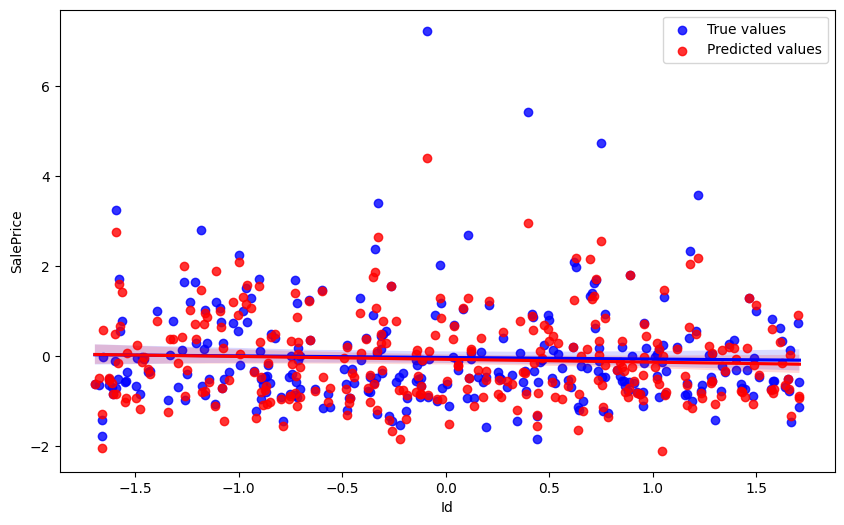

In [ ]:
from sklearn.model_selection import train_test_split

# Suppose que 'df' est votre dataframe et 'SalePrice' est votre variable cible
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression

# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les résultats de l'ensemble de test
y_pred = model.predict(X_test)
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer les valeurs réelles et les valeurs prédites
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test.iloc[:, 0], y=y_test, color='blue', label='True values')
sns.regplot(x=X_test.iloc[:, 0], y=y_pred, color='red', label='Predicted values')
plt.legend()
plt.show()

sns.regplot : Trace une régression linéaire et montre la relation entre les valeurs réelles et prédites.

LinearRegression : Réalise une régression linéaire classique.

Objectif : Créer et entraîner un modèle de régression linéaire, puis prédire les résultats de l'ensemble de test.

In [ ]:

# 3. Sélection du modèle de ML
models = {
    "Régression linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression (SVR)": SVR()
}



Objectif : Définir les modèles de machine learning à utiliser pour la prédiction.
Objectif : Définir un dictionnaire contenant les modèles de machine learning à utiliser pour la prédiction.

In [ ]:
# 4. Evaluation des modèles de ML
results = {}
for name, model in models.items():
    print(f"\nModèle : {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MSE : {mse:.2f}")
    print(f"R² : {r2:.2f}")
    results[name] = (mse, r2)




Modèle : Régression linéaire
MSE : 0.20
R² : 0.84

Modèle : Random Forest
MSE : 0.13
R² : 0.89

Modèle : Support Vector Regression (SVR)
MSE : 0.17
R² : 0.86


SVR:


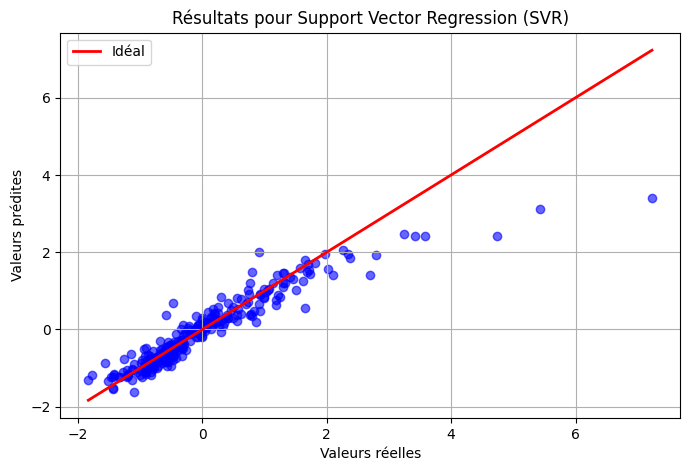

In [ ]:

    # Visualisation des résultats
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Idéal')
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Valeurs prédites")
    plt.title(f"Résultats pour {name}")
    plt.legend()
    plt.grid()
    plt.show()


Objectif : Évaluer les performances de chaque modèle en calculant le MSE (Erreur Quadratique Moyenne) et le R², puis visualiser les résultats obtenus.


MSE (Erreur quadratique moyenne) : Mesure la précision des prédictions (valeurs plus faibles = meilleur modèle).
R² : Indique la proportion de la variance expliquée par le modèle.

In [ ]:
print("\nRésumé des performances :")
for name, (mse, r2) in results.items():
    print(f"{name} -> MSE: {mse:.2f}, R²: {r2:.2f}")


Résumé des performances :
Régression linéaire -> MSE: 0.20, R²: 0.84
Random Forest -> MSE: 0.13, R²: 0.89
Support Vector Regression (SVR) -> MSE: 0.17, R²: 0.86


Les valeurs de MSE indiquent que l'arbre de décision offre la meilleure performance parmi les trois modèles, car elle est la plus basse. Le R² plus proche de 1 signifie une meilleure qualité de la prédiction. L'arbre de décision offre également une très bonne performance.

Objectif : Afficher un résumé des performances des différents modèles de machine learning.